In [2]:
# 구글 드라이브 MOUNT
from google.colab import drive
drive.mount('/content/drive')

# github와 연동하고 싶은 폴더로 이동
%cd /content/drive/MyDrive/study_DL/Study_DL

Mounted at /content/drive
/content/drive/MyDrive/study_DL/Study_DL


# 1D 합성곱 연산

## 실습: imdb데이터

### 데이터 불러오기

In [3]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = 10000)

x_train.shape, x_test.shape

17464789/17464789 [==============================] - 0s 0us/step


((25000,), (25000,))

In [5]:
# 데이터 패딩화

x_train = pad_sequences(x_train, 500)
x_test = pad_sequences(x_test, 500)

x_train.shape, x_test.shape

((25000, 500), (25000, 500))

### 모델 생성

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Embedding, MaxPooling1D, GlobalMaxPooling1D

In [23]:
model = Sequential()

model.add(Embedding(10000, 128, input_length = 500))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_4 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                

In [7]:
from keras import optimizers

In [25]:
model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 3s 12ms/step - loss: 0.7898 - acc: 0.5046 - val_loss: 0.6909 - val_acc: 0.5186
Epoch 2/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6755 - acc: 0.6440 - val_loss: 0.6742 - val_acc: 0.6504
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 0.6420 - acc: 0.7541 - val_loss: 0.6397 - val_acc: 0.7272
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 0.5785 - acc: 0.8073 - val_loss: 0.5582 - val_acc: 0.7520
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 0.4608 - acc: 0.8389 - val_loss: 0.4363 - val_acc: 0.8290
Epoch 6/10
157/157 [==============================] - 2s 11ms/step - loss: 0.3614 - acc: 0.8677 - val_loss: 0.3999 - val_acc: 0.8492
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.3075 - acc: 0.8880 - val_loss: 0.3807 - val_acc: 0.8600
Epoch 8/10
157/157 [==============================] - 2s 11ms/step - 

### 시각화

In [18]:
import matplotlib.pyplot as plt

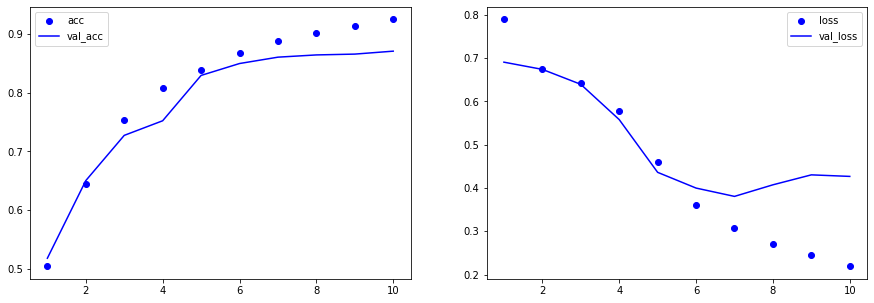

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

score = ['acc', 'loss']
val_score = [f'val_{i}' for i in score]

epochs = range(1, 11)

plt.figure(figsize = (15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(epochs, eval(score[i]), 'bo', label = score[i])
    plt.plot(epochs, eval(val_score[i]), 'b', label = val_score[i])
    plt.legend()
plt.show()

# CNN과 RNN 연결

## 실습: 기온 예측 데이터

### 데이터 불러오기

In [8]:
import os
import pandas as pd
import numpy as np

In [9]:
base_dir = '../필요데이터/jena_climate/'

fname = os.path.join(base_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

In [10]:
climate_df = pd.read_csv(fname)
climate_df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [11]:
climate_df.values.shape

(420551, 15)

### 데이터 전처리

In [12]:
header = climate_df.columns

values = climate_df.iloc[:,1:].values

In [13]:
# 데이터 스케일링
## 피처 데이터마다 범위가 다르기 때문에 스케일링이 필요함

all_values = (values - values[:200000].mean(axis = 0))/values[:200000].std(axis = 0)
all_values.shape

(420551, 14)

In [34]:
# 과거 데이터의 배치와 미래 타깃 온도를 추출하는 파이썬 제너레이터 만들기

- data: 정규화한 부동 소수 데이터로 이루어진 원본 배열
- lookback: 거슬러 올라가기 위한 타임스텝
- delay: 타깃으로 사용할 미래의 타임스텝
- min_idx, max_idx: 추출할 타임스텝의 범위를 지정하기 위한 data배열의 인덱스, 검증/테스트 데이터 분리하는데 사용함
- shuffle: 샘플을 섞을지, 시간 순서대로 추출할지 결정
- batch_size: 배치 샘플 수
- step: 데이터 샘플링할 타임스텝 간격: 1시간에 한개씩으로하기 위해 6으로 지정

In [14]:
def generator(data, lookback, delay, min_idx, max_idx, shuffle = False, batch_size = 128, step = 6):
  if max_idx is None:
    max_idx = len(data) - delay - 1
  
  # 피처 단위 인덱스
  i = min_idx + lookback

  while 1:
    # shuffle이 true면, 행 인덱스 범위 내에서 배치 샘플수만큼 인덱스 추출
    if shuffle:
      rows = np.random.randint(min_idx + lookback, max_idx, size = batch_size)
    
    # false이고, 행 인덱스 +  
    else:
      if i + batch_size >= max_idx:
        i = min_idx + lookback

      rows = np.arange(i, min(i + batch_size, max_idx))
      i += len(rows)

    samples = np.zeros((len(rows),
                        lookback // step,
                        data.shape[-1]))
    # print(samples.shape)
    
    targets = np.zeros((len(rows),))
    # print(targets.shape)

    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]

    yield samples, targets

In [15]:
lookback = 1440
step = 3
delay = 144
batch_size = 128

train_gen = generator(all_values,
                      lookback = lookback,
                      delay = delay,
                      min_idx = 0,
                      max_idx = 200000,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size)

val_gen = generator(all_values,
                    lookback = lookback,
                    delay = delay,
                    min_idx = 200001,
                    max_idx = 300000,
                    step = step,
                    batch_size = batch_size)

test_gen = generator(all_values,
                    lookback = lookback,
                    delay = delay,
                    min_idx = 300001,
                    max_idx = None,
                    step = step,
                    batch_size = batch_size)



In [16]:
val_steps = (300000 - 200001 - lookback) // batch_size

test_steps = (len(values) - 300001 - lookback) // batch_size

In [17]:
val_steps, test_steps

(769, 930)

### CNN 스태킹 모델로 돌려보기

In [18]:
model = Sequential()

model.add(Conv1D(32, 5, activation = 'relu', input_shape = (None, all_values.shape[-1])))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 32)          2272      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          5152      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0

In [42]:
model.compile(optimizer = optimizers.RMSprop(), 
              loss = 'mae')

history = model.fit(train_gen,
                    steps_per_epoch = 500,
                    epochs = 20,
                    validation_data = val_gen, 
                    validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 20s 38ms/step - loss: 0.4183 - val_loss: 0.4369
Epoch 2/20
500/500 [==============================] - 18s 37ms/step - loss: 0.3749 - val_loss: 0.4298
Epoch 3/20
500/500 [==============================] - 18s 36ms/step - loss: 0.3594 - val_loss: 0.4456
Epoch 4/20
500/500 [==============================] - 17s 33ms/step - loss: 0.3478 - val_loss: 0.4571
Epoch 5/20
500/500 [==============================] - 17s 33ms/step - loss: 0.3396 - val_loss: 0.4509
Epoch 6/20
500/500 [==============================] - 18s 36ms/step - loss: 0.3347 - val_loss: 0.4490
Epoch 7/20
500/500 [==============================] - 18s 35ms/step - loss: 0.3284 - val_loss: 0.4459
Epoch 8/20
500/500 [==============================] - 23s 46ms/step - loss: 0.3263 - val_loss: 0.4428
Epoch 9/20
500/500 [==============================] - 17s 35ms/step - loss: 0.3213 - val_loss: 0.4739
Epoch 10/20
500/500 [==============================] - 17s 34ms/step - loss: 0.316

#### 시각화

In [44]:
import matplotlib.pyplot as plt

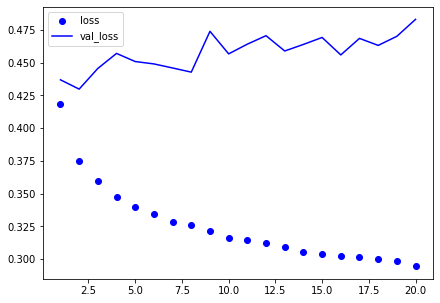

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 21)

plt.figure(figsize = (7, 5))

plt.plot(epochs, loss, 'bo', label = 'loss')
plt.plot(epochs, val_loss, 'b', label = 'val_loss')
plt.legend()
plt.show()

- mae가 0.425 이상으로 머물러있음
- 작은 컨브넷층을 두겹 쌓아 학습한 모델에서는 상식 수준의 기준점을 넘지 못함
- 왜냐하면, 입력 시계열에 있는 패턴을 보고 시간 축 위치(시작과 끝)을 고려하지 않았기 때문! 즉, 순서를 고려하지 않고 특성만 봤다는 것
- 최근 데이터포인트일 수록 오래된 데이터 포이트와 다르게 해석해야하기 때문에 컨브넷만으로는 의미있는 층을 만들 수 없음
- 이 데이터는 시계열 데이터로 기온을 예측하는 데이터기 때문에 역시 좋은 결과가 나오지 못한 것! 
- 따라서, CNN 층에 RNN층을 쌓아서 다시 해보겠음

#### 층마다 모델 출력된 결과 확인해보기

In [19]:
from keras import models, layers

In [20]:
# 모델의 층별 아웃풋 객체를 리스트화

layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, None, 32) dtype=float32 (created by layer 'conv1d')>,
 <KerasTensor: shape=(None, None, 32) dtype=float32 (created by layer 'max_pooling1d')>,
 <KerasTensor: shape=(None, None, 32) dtype=float32 (created by layer 'conv1d_1')>,
 <KerasTensor: shape=(None, None, 32) dtype=float32 (created by layer 'max_pooling1d_1')>,
 <KerasTensor: shape=(None, None, 32) dtype=float32 (created by layer 'conv1d_2')>,
 <KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'global_max_pooling1d')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>]

In [21]:
# 간이 모델 만들기

activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activation_model

In [23]:
test_tr_lb = next(test_gen)

# shape확인
print(test_tr_lb[0].shape)

# 테스트할 데이터 한개 추출
test_1 = test_tr_lb[0][0]
print(test_1.shape)

(128, 480, 14)
(480, 14)


In [46]:
test_1_1 = test_1[np.newaxis, :,:]
test_1_1.shape

(1, 480, 14)

In [48]:
# 층별 결과 확인
activations  = activation_model.predict(test_1_1)

1/1 [==============================] - 0s 25ms/step


In [57]:
for i in range(7):
  print(f'#######{layer_outputs[i].name}')
  print(f'{activations[i].shape}')
  if i == 6:
    print(activations[i])
  else:
    print()

#######conv1d/Relu:0
(1, 476, 32)

#######max_pooling1d/Squeeze:0
(1, 158, 32)

#######conv1d_1/Relu:0
(1, 154, 32)

#######max_pooling1d_1/Squeeze:0
(1, 51, 32)

#######conv1d_2/Relu:0
(1, 47, 32)

#######global_max_pooling1d/Max:0
(1, 32)

#######dense/BiasAdd:0
(1, 1)
[[0.35762945]]


In [56]:
label_1 = test_tr_lb[1][0]
label_1

-0.3995876099112856

### CNN + RNN 모델로 돌려보기

In [60]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling1D, Conv1D, GlobalMaxPooling1D, GRU

In [61]:
model = Sequential()

model.add(Conv1D(32, 5, activation = 'relu', input_shape = (None, 14)))
model.add(MaxPooling1D(3))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(GRU(32, dropout = 0.1, recurrent_dropout = 0.5))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, None, 32)          2272      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, None, 32)          5152      
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
__________________________________________________

In [64]:
model.compile(optimizer = optimizers.RMSprop(),
              loss = 'mae')

history = model.fit(train_gen,
                    steps_per_epoch = 500,
                    epochs = 20,
                    validation_data = val_gen,
                    validation_steps = val_steps)

Epoch 1/20
500/500 [==============================] - 384s 759ms/step - loss: 0.3312 - val_loss: 0.2997
Epoch 2/20
500/500 [==============================] - 367s 732ms/step - loss: 0.2939 - val_loss: 0.2872
Epoch 3/20
500/500 [==============================] - 369s 738ms/step - loss: 0.2811 - val_loss: 0.2765
Epoch 4/20
500/500 [==============================] - 366s 731ms/step - loss: 0.2709 - val_loss: 0.2846
Epoch 5/20
500/500 [==============================] - 362s 723ms/step - loss: 0.2641 - val_loss: 0.2935
Epoch 6/20
500/500 [==============================] - 372s 744ms/step - loss: 0.2573 - val_loss: 0.2820
Epoch 7/20
500/500 [==============================] - 368s 736ms/step - loss: 0.2524 - val_loss: 0.2763
Epoch 8/20
500/500 [==============================] - 365s 730ms/step - loss: 0.2451 - val_loss: 0.2930
Epoch 9/20
500/500 [==============================] - 373s 745ms/step - loss: 0.2405 - val_loss: 0.2858
Epoch 10/20
500/500 [==============================] - 372s 745m

#### 시각화

In [67]:
import matplotlib.pyplot as plt

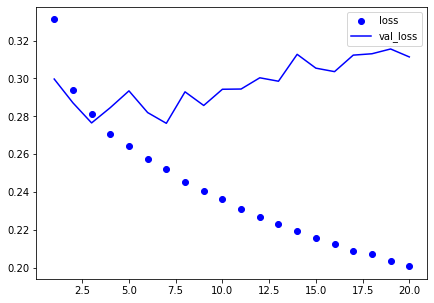

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 21)

plt.figure(figsize = (7, 5))

plt.plot(epochs, loss, 'bo', label = 'loss')
plt.plot(epochs, val_loss, 'b', label = 'val_loss')
plt.legend()
plt.show()